# Optimization 

The goal of this notebook is just to dip your toes into the realm of optimization which is arguably the most important research topic today - all of ML relies on being able to optimize functions ASAP.

# Definitions

Apologies in advance as algorithms cannot be written in nice pseudo-code in native Jupyter, so I have some jank bulleted lists

### Unimodal

A real-valued function $f$ is unimodal on an interval if there is a unique value $x^*$ in the interval such that $f(x^*)$ is the minimum of $f$ on the interval, and $f$ is strictly decreasing for $x\leq x^*$ and strictly increasing for $x^*\leq x$.

### Golden Section Search

*Golden Section Search Algorithm* 

* *Input*: a function $f$, a unimodal interval for $f$: $[a,b]$, and an error tolerance $tol$

* $\tau = \frac{\sqrt{5} - 1}{2}$

* $x_1 = a + (1-\tau)(b-a)$

* $f_1 = f(x_1)$

* $x_2 = a + \tau (b-a)$

* $f_2 = f(x_2)$


* *while* $\left((b - a) > tol\right)$ *do*
    * *if* $(f_1 > f_2)$ *then*
        * $a = x_1$

        * $x_1 = x_2$

        * $f_1 = f_2$

        * $x_2 = a + \tau (b-a)$

        * $f_2 = f(x_2)$
   
    * *else*
        * $b = x_2$

        * $x_2 = x_1$

        * $f_2 = f_1$

        * $x_1 = a + (1-\tau)(b-a)$

        * $f_1 = f(x_1)$

    * *end*
    
* *end*



# Algorithm Implementation

This section is designated to implementing the optimization algorithms and benchmarking performance against datasets. 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.animation import FuncAnimation

In [2]:
# timer class to benchmark running times of algorithms
class Timer: 
    """Record multiple running times"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """Start timer"""
        self.tik = time.time()

    def stop(self):
        """Stop timer and record the time in a list"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg_time(self):
        """Return average time"""
        return sum(self.times) / len(self.times)

    def sum_time(self):
        """Return sum of time"""
        return sum(self.times)

    def cumsum_time(self):
        """Return accumulated time"""
        return np.array(self.times).cumsum().tolist()

## Golden Section Search

**Note**: Benchmarking this particular algorithm in relation to other ones is not intelligent in the slightest as this algorithm assumes we already are given a unimodal interval - useful only in theory.

In [3]:
def golden_section_search(f, a, b, tol):
    """
    :param: f - function taking a float as input and float as output 
    :param: a - float, specifying min point on the unimodal interval for f
    :param: b - float, specifying max point on the unimodal interval for f
    :param: tol - float, specifying tolerance for how smallest interval to search
    :return: minimum - float, where f is smallest on the interval
    """
    tau = (np.sqrt(5) - 1) / 2
    x_1 = a + (1 - tau) * (b - a)
    f_1 = f(x_1)
    x_2 = a + tau * (b - a)
    f_2 = f(x_2)
    
    while (b - a) > tol:
        if f_1 > f_2:
            a = x_1
            x_1 = x_2
            f_1 = f_2
            x_2 = a + tau * (b - a)
            f_2 = f(x_2)
        else:
            b = x_2
            x_2 = x_1
            f_2 = f_1
            x_1 = a + (1 - tau) * (b - a)
            f_1 = f(x_1)
            
    return f_1

# Example function
def quadratic_func(x):
    return x ** 2

min_point = -10
max_point = 10
tol = 0.1

# Time how long it takes to find min
timer = Timer()
timer.start()
min_est = golden_section_search(f=quadratic_func, a=min_point, b=max_point, tol=tol)
print(f'Estimated Minimum: {min_est:.7f}')
print(f'Time: {timer.stop():.7f} sec')

Estimated Minimum: 0.0000537
Time: 0.0005488 sec


## Examples

### Unimodal Functions

Clearly $y=x^2$ is unimodal over all of $\mathbb{R}$ and we can see that below. A function is unimodal again if there is a unique local minimum for some interval $[a,b]$ - uniqueness of the local minimum can be found by checking if the derivative of the function is zero or not. $y=20$ has derivative zero and we see the minimum is not unique.

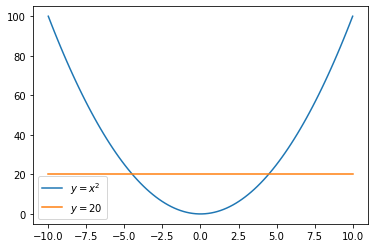

In [5]:
x = np.linspace(-10, 10, 100)
y1 = x ** 2
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y1, label = "$y=x^2$")
ax.plot(x, np.repeat(20, 100), label = "$y=20$")
ax.legend()

### Golden Section Search Example

Consider the above function $y = x^2$ on the interval $[-10,10]$ where it is unimodal. We can look at the iterations 

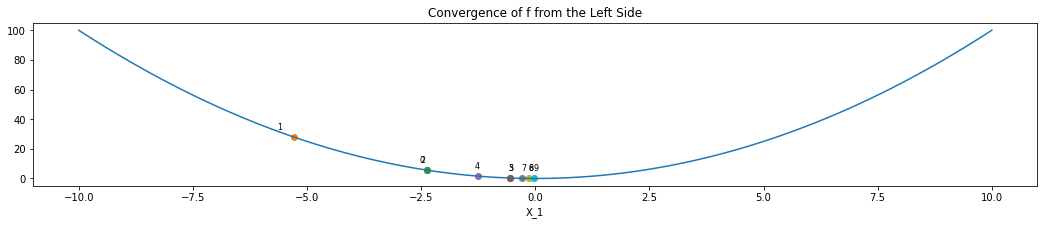

In [24]:
def quadratic_func(x):
    return x ** 2

# intializing params
a = -10
b = 10
tol = 0.1

# generate the points for plotting
start_points = []
end_points = []
start_values = []
end_values = []

tau = (np.sqrt(5) - 1) / 2
x_1 = a + (1 - tau) * (b - a)
start_points.append(x_1)
f_1 = quadratic_func(x_1)
start_values.append(f_1)
x_2 = a + tau * (b - a)
end_points.append(x_2)
f_2 = quadratic_func(x_2)
end_values.append(f_2)

while (b - a) > tol:
    if f_1 > f_2:
        a = x_1
        x_1 = x_2
        start_points.append(x_1)
        f_1 = f_2
        start_values.append(f_1)
        x_2 = a + tau * (b - a)
        end_points.append(x_2)
        f_2 = quadratic_func(x_2)
        end_values.append(f_2)
    else:
        b = x_2
        x_2 = x_1
        end_points.append(x_2)
        f_2 = f_1
        end_values.append(f_2)
        x_1 = a + (1 - tau) * (b - a)
        start_points.append(x_1)
        f_1 = quadratic_func(x_1)
        start_values.append(f_1)
                
fig, ax = plt.subplots(figsize=(18, 3))
x = np.linspace(-10, 10, 100)
y1 = x ** 2
ax.plot(x, y1, label = "$y=x^2$")
for i in range(10):
    ax.scatter(start_points[i], start_values[i])
    ax.text(start_points[i] * (1.07), start_values[i] + 5 , i, fontsize=8)
    
plt.xlabel("X_1")
plt.title("Convergence of f from the Left Side")
plt.show()

## Theory Problems

Problems taken Chapter 6 in Heath's book:

**6.1.** True or false: Points that minimize a nonlinear function are inherently less accurately determined than points for which a nonlinear function has a zero value.

- False: I do not like the wording, but I belive by less accurate he means more difficult to find. In this case it makes sense as stationary (zeros) are needed in the process of finding a minimum of a function. That is the latter also requires checking the partials and potentially higher order derivatives to verify if the point is a minimum.

**6.2.** True or false: If a function is unimodal on a closed interval, then it has exactly one minimum on the interval.

- True: By definition, we know that if there were not a unique minimum on the interval then $f$ would not be strictly decreasing and then strictly increasing after the point.

**6.3** True or false: In minimizing a unimodal function of one variable by golden section search, the point discarded at each iteration is always the point having the largest function value.

- True

**6.4** True or false: For minimizing a real-valued function of several variables, the steepest descent method is usually more rapidly convergent than Newton's method.

## Coding Problems

asdf

# Sources

- "Scientific Computing: An Introductory Survey" by Michael Heath.
    - Cool book - used at stanford for graduate ml course, so trust me, it's good.